# Tipsbet Analysis


## Initialisation

In [1]:
from tips import Tips
import datetime as dt
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
plt.style.use('dark_background')
plt.style.use('seaborn')
graph_size=(14,10)

## Load Data
The Tips module loads data all the data between the given start and end dates (both default to today if not given)

In [17]:
start = dt.datetime.now() - dt.timedelta(days=1000)
t = Tips(start)

2017-10-27 12:30:00.756813 2020-07-25 23:00:00


## Functions
Functions to be used to analyse/plot data

In [4]:
def get_cumsum(df, col=None):
    pass
    

In [35]:
filter_fn = t.df.Time > pd.to_datetime(dt.date.today() - dt.timedelta(days=1))
filter_fn &= t.df.Time < pd.to_datetime(dt.date.today())
# filter_fn &= t.df.Status == 'L'
t.df[filter_fn]

,Time,Country,Sport,Competitions,Teams,Tip,Odds,Results,Status,Return,Profit
12793,2020-07-31 19:30:00,Austria,Football,2.Liga,A. Klagenfurt – Innsbruck,1,1.36,6-1,W,1.36,0.36
12794,2020-07-31 18:30:00,Belarus,Football,Vysshaya Liga,D. Brest – Vitebsk,over 1.5,1.22,1-0,L,0.00,-1.00
12795,2020-07-31 20:10:00,France,Football,Coupe de la Ligue,PSG – Lyon,1,1.44,0-0,L,0.00,-1.00
12796,2020-07-31 20:15:00,Iceland,Football,Icelandic Cup,Valur – Akranes,1,1.28,Postp.,W,1.28,0.28
12797,2020-07-31 19:45:00,Ireland,Football,Premier Division,Dundalk – St. Patricks,1,1.44,1-1,L,0.00,-1.00
12798,2020-07-31 20:00:00,Italy,Football,Serie B,Entella – Cittadella,x2,1.20,2-3,W,1.20,0.20
12799,2020-07-31 17:00:00,Norway,Football,OBOS ligaen,Ranheim – Kongsvinger,1,1.36,3-2,W,1.36,0.36
12800,2020-07-31 18:30:00,Romania,Football,Liga 1,FCSB – CFR Cluj,under 3.5,1.23,0-2,W,1.23,0.23
12801,2020-07-31 19:00:00,Serbia,Football,Super Liga,Mladost – Javor,1,1.57,2-1,W,1.57,0.57
12802,2020-07-31 19:30:00,Switzerland,Football,Super League,St. Gallen – Xamax,1,1.25,6-0,W,1.25,0.25


## Analysis

In [5]:
t.df[t.df.Time >= pd.to_datetime(dt.date.today())].Odds.agg('prod')

77.79172123151773

In [6]:
print(t.df.Time.dt.date.min(), '-', t.df.Time.dt.date.max())
print(t.df.Status.value_counts().to_string() + '\n')
print((t.df.Status.value_counts(normalize=True).round(4) * 100).to_string())

2017-11-05 - 2020-08-01
W    9341
L    3418
?      63

W    72.85
L    26.66
?     0.49


In [7]:
print(t.df.groupby('Sport').Status.value_counts().to_string())
print((t.df.groupby('Sport').Status.value_counts(normalize=True).round(4) * 100).to_string())

Sport       Status
Basketball  W          525
            L          223
            ?            4
Football    W         7970
            L         2848
            ?           55
Tennis      W          846
            L          347
            ?            4
Sport       Status
Basketball  W         69.81
            L         29.65
            ?          0.53
Football    W         73.30
            L         26.19
            ?          0.51
Tennis      W         70.68
            L         28.99
            ?          0.33


In [8]:
# t._update_dataset(t.full_dataset)
# t.store_df()

In [9]:
fd = t.full_dataset
stake = 5
filt = lambda x : (fd.Time > dt.datetime(2020, 1, 1)) & (fd.Odds > x) & (fd.Sport == 'Football')
profits = [fd[filt(x/100)].Profit.sum() * stake for x in range(100, 300, 5)]
avg_profit = fd.Profit.mean()

# ax = plt.figure(figsize=graph_size)
# plt.bar([a/100 for a in range(100,300,5)], profits)


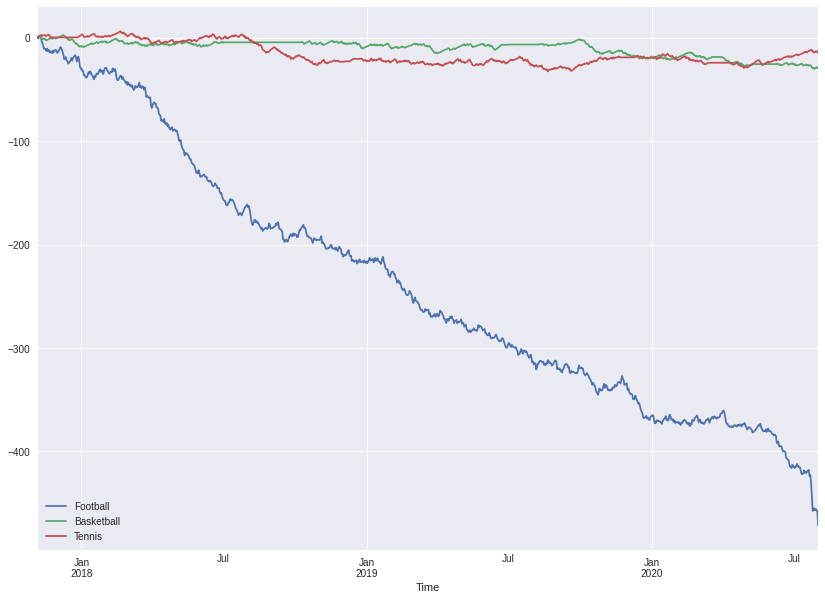

In [10]:
sports = t.df.Sport.unique()
df_sports = pd.DataFrame(index=t.df.resample('1D', on='Time').agg({'Profit': 'sum'}).index)
for sport in sports:
    filt = (t.df.Sport == sport)
    df_sports[sport] = t.df[filt].resample('1D', on='Time').agg({'Profit': 'sum'}).sort_index()
    df_sports[sport] = df_sports[sport].cumsum().fillna(0)

df_sports.plot(figsize=graph_size)

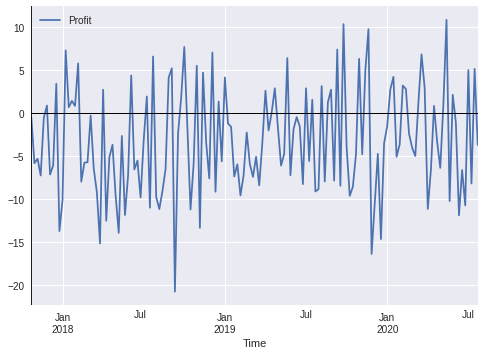

In [11]:
filtered = fd[fd.Time < dt.datetime(2020,7,23)].resample('1W', on='Time').agg({'Profit': 'sum', 'Odds': 'mean', 'Sport': 'size'})
ax = filtered.plot(y='Profit')
ax.axhline(y=0, color='k', linewidth=1)
ax.axvline(x=fd.Time.min(), color='k')


In [12]:
sample = fd.copy()
sample['Select'] = (np.random.random(size=sample.Sport.size) < 0.2) * sample.Return
# sample.Select = sample.Select.replace(0, 1)
print(sample.Select.max())
print((sample.resample('1D', on='Time').agg({'Select': 'prod', 'Odds': 'size'}).Select.replace(0, -1) * stake).sum())

2.1
-5005.0


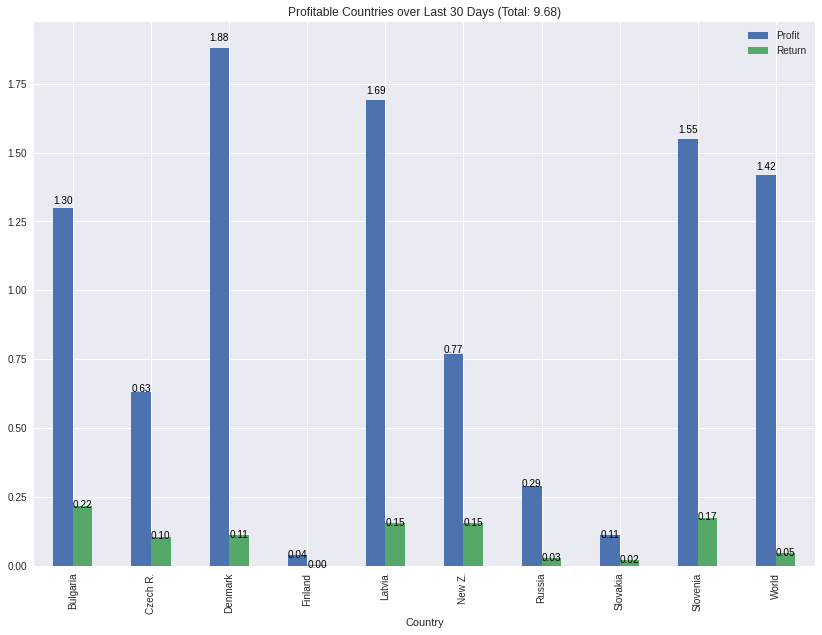

In [75]:
days = 30
filt_fn = t.df.Time > pd.to_datetime(dt.date.today() - dt.timedelta(days=days))
subset = t.df[filt_fn].groupby(['Country']).agg({'Profit': 'sum', 'Return': 'size'})
subset = subset[subset.Profit > 0]
subset.Return = subset.Profit / subset.Return
subset_plot = subset.plot.bar(figsize=graph_size, title=str('Profitable Countries over Last {}' + 
                                                            ' Days (Total: {:.2f})'
                                                           ).format(days, subset.Profit.sum()))

font = {'color': 'black'}

for p in subset_plot.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    subset_plot.text(x + width / 2.0, y + height * 1.02,
            '{:.2f}'.format(height), horizontalalignment='center',
            verticalalignment='center', fontdict=font)

In [13]:
t.df[t.df.Odds <= 1.3].Status.value_counts(normalize=True).round(4) * 100


W    78.03
L    21.53
?     0.44
Name: Status, dtype: float64

In [14]:
t.df['Return'].value_counts()

0.00    3481
1.22    1397
1.20    1387
1.25    1046
1.44     475
        ... 
1.78       1
1.56       1
1.54       1
1.76       1
2.45       1
Name: Return, Length: 73, dtype: int64

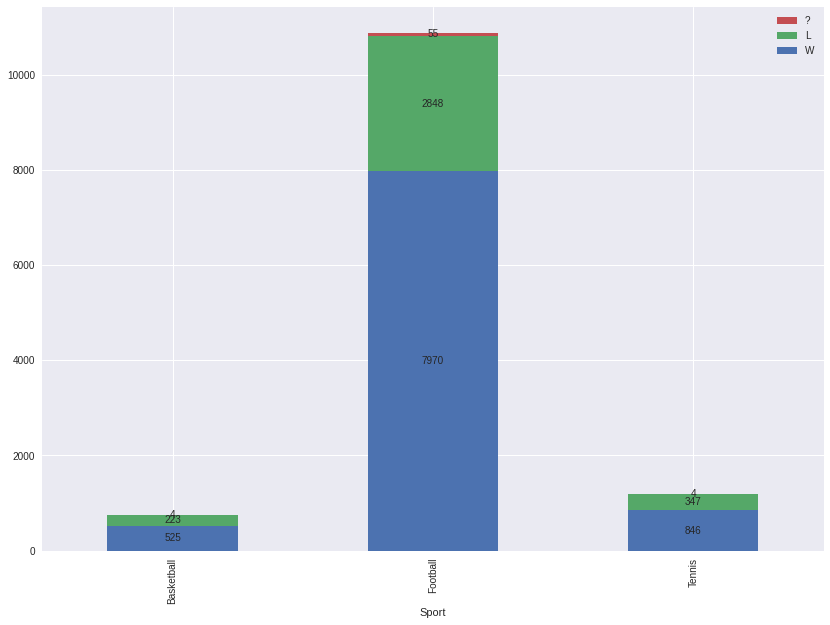

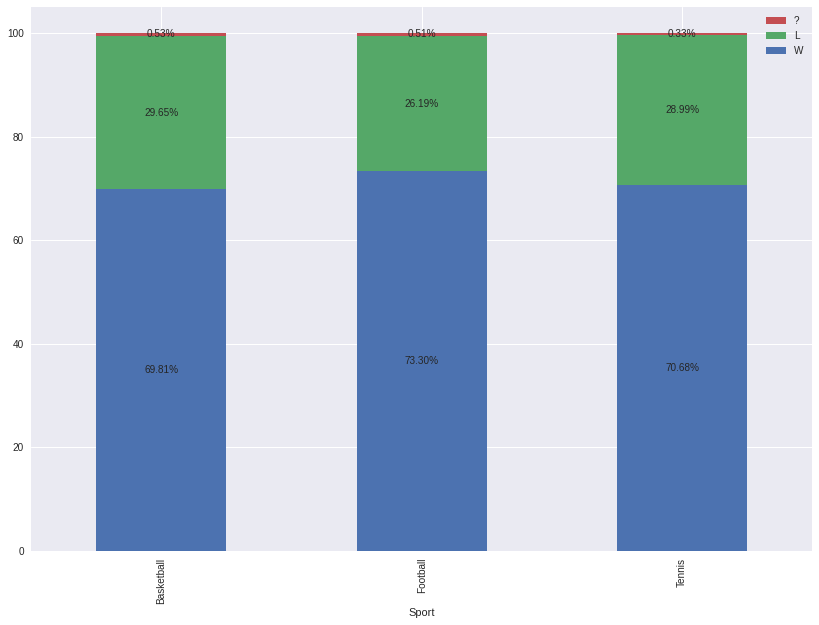

In [15]:
t.plot_status(by='Sport', relative=False)
t.plot_status(by='Sport', relative=True)

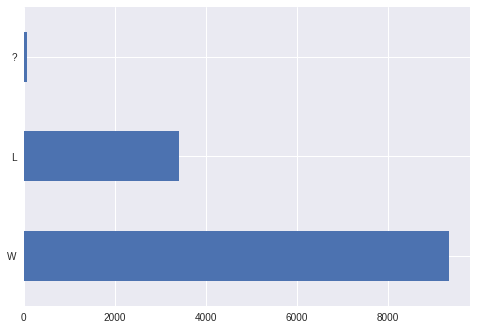

In [16]:
t.df.Status.value_counts().plot(kind='barh')